In [129]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=10000
pd.options.display.max_colwidth=-1

In [130]:
data= pd.read_csv('Iris.csv')

In [131]:
df=data.copy()

In [132]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [134]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [135]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


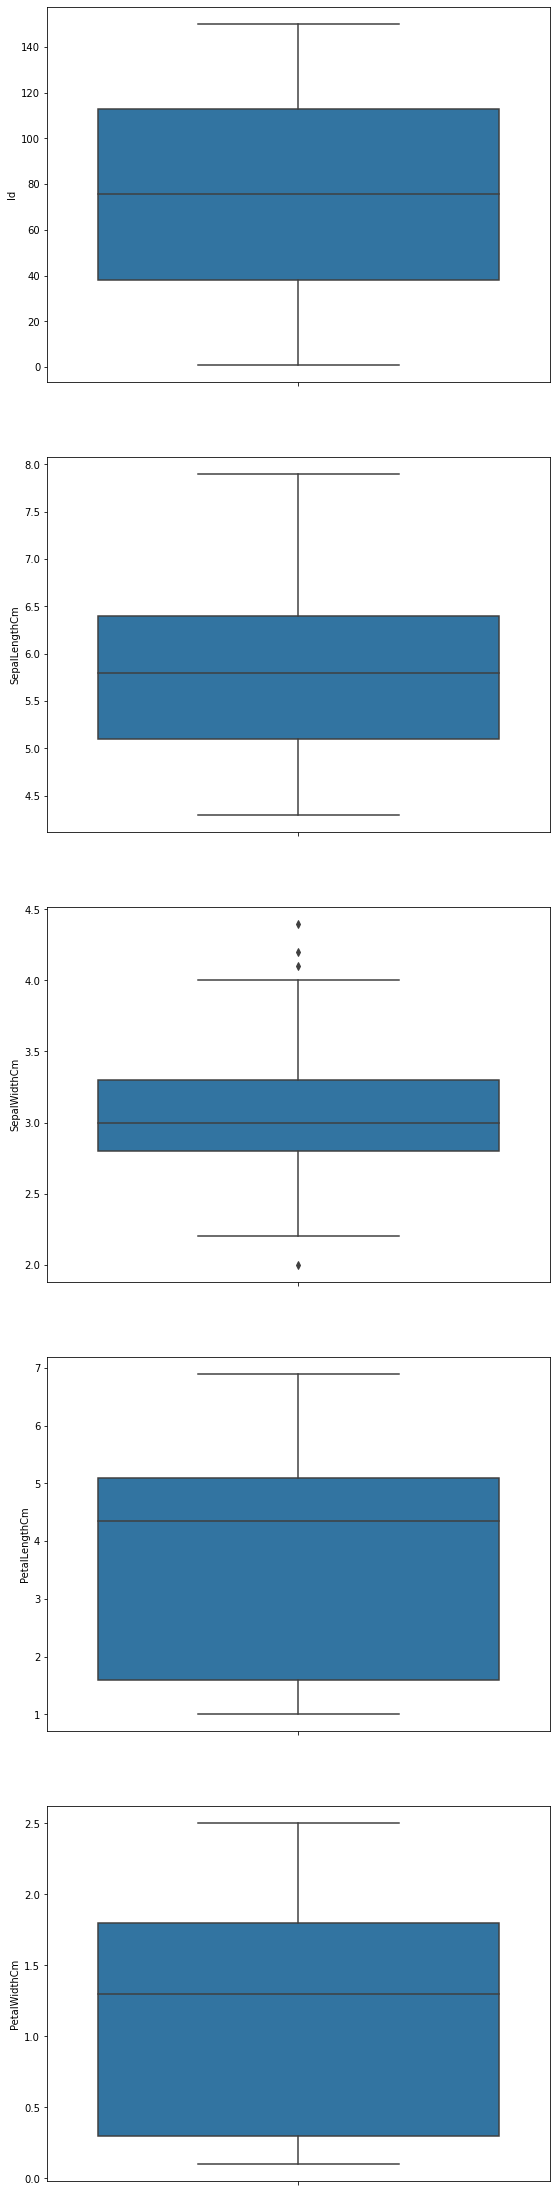

In [136]:
columns_name=df.drop("Species",axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name),figsize=(9,40))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i],data=df)

<AxesSubplot:>

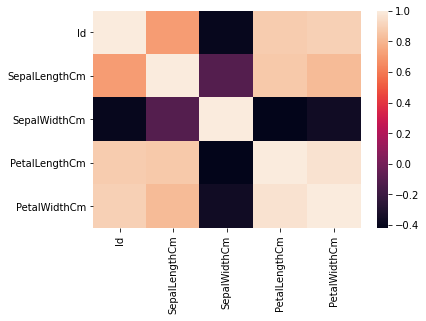

In [137]:
sns.heatmap(df.corr())

In [138]:
df.drop('Species', inplace=True, axis=1)

In [141]:
X = df.iloc[:,[1,2,3,4]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

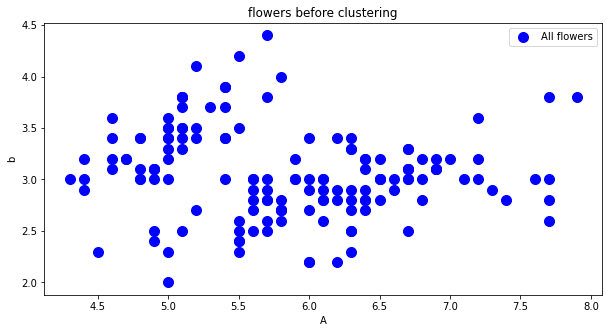

In [142]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='b',label='All flowers')
plt.title('flowers before clustering')
plt.xlabel('A')
plt.ylabel('b')
plt.legend()
plt.show()

In [143]:
km_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit(df)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [144]:
km_model.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

In [145]:
km_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

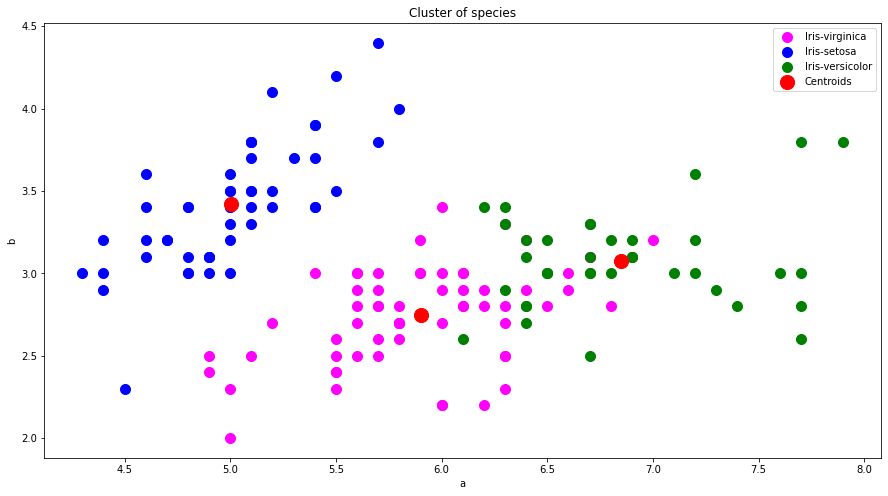

In [146]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta', label='Iris-virginica')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-versicolor')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of species')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()

In [147]:
df_kmeans=df.copy()
df_kmeans['species']=km_model.labels_
df_kmeans.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [148]:
df_kmeans.groupby('species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
species,,,,,
0,6275,329.4,148.7,277.6,101.3
1,1275,250.3,170.9,73.2,12.2
2,3775,296.8,138.5,213.0,66.3


In [149]:
replacevalues={0: 'Iris-virginica', 1:'Iris-setosa', 2:'Iris-versicolor'}
final_df_kmeans=df_kmeans.replace({'species':replacevalues})

In [150]:
final_df_kmeans.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [151]:
final_df_kmeans.iloc[:,5].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

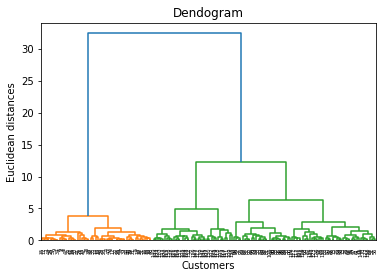

In [155]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [163]:
import scipy.cluster.hierarchy as sch #hesablama
from scipy.cluster.hierarchy import linkage, dendrogram #visual
from sklearn.cluster import AgglomerativeClustering # 
from sklearn.cluster import AgglomerativeClustering as AC

In [165]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

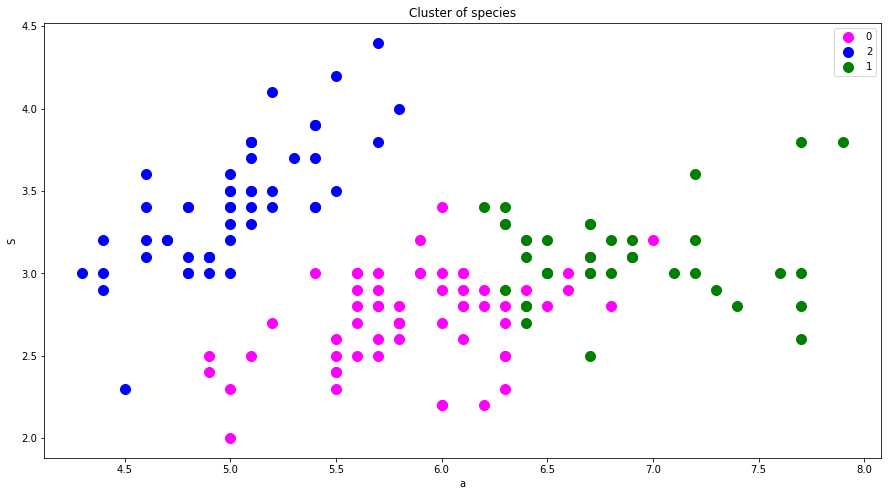

In [169]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='0')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='1')

plt.title('Cluster of species')
plt.xlabel('a')
plt.ylabel('S')
plt.legend()
plt.ioff()
plt.show()

In [170]:
df_hierachical=df.copy()
df_hierachical["Species"]=label_pred_hierachical
df_hierachical

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [171]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [176]:
df_hierachical.groupby("Species").sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,1891,316.3,201.6,120.4,27.0
1,6275,329.4,148.7,277.6,101.3
2,3159,230.8,107.8,165.8,51.5


In [177]:
replace_values={1:"Iris-virginica",2:"Iris-versicolor",0:"Iris-setosa"}
final_df_hierachical=df_hierachical.replace({"species":replace_values})
final_df_hierachical

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [178]:
final_df_hierachical.iloc[:,5].value_counts()

0    61
1    50
2    39
Name: Species, dtype: int64